In [76]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras import metrics
from keras.regularizers import l2
from keras import optimizers
from keras import backend as K
from keras.wrappers.scikit_learn import KerasRegressor

In [3]:
df=pd.read_csv('/home/siddharth/Documents/ml data/House price prediction/train.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [5]:
#Dropped the columns which has missing values more than 50%
df2=df
df2.drop(["Id","Alley","FireplaceQu","PoolQC","Fence","MiscFeature"],axis=1, inplace=True)


In [7]:
#looking into data of SalePrice
print(df2['SalePrice'].describe())

count      1460.000000
mean     180921.195890
std       79442.502883
min       34900.000000
25%      129975.000000
50%      163000.000000
75%      214000.000000
max      755000.000000
Name: SalePrice, dtype: float64


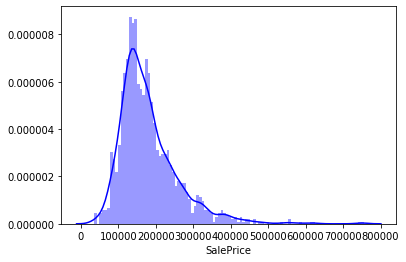

In [8]:
#looking for outliers in SalePrice 
sns.distplot(df2['SalePrice'], color = 'blue' ,bins=100, hist_kws={'alpha': 0.4});


There are outliers after 450000 

# ANALYSING NUMERICAL DATA DISTRIBUTION OF FEATURES HAVING NUMERICAL DATATYPE

In [9]:
list(set(df2.dtypes.tolist()))

[dtype('float64'), dtype('O'), dtype('int64')]

In [10]:
df2_num = df2.select_dtypes(include = ['float64','int64'])
df2_num.head()
#displaying only the features with float64 and int64 dststypes(there are 37 such features)

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,192,84,0,0,0,0,0,12,2008,250000


Finding the correlation of SalePrice with the numerical features


In [11]:
cor=df2.corr()
df2corr=abs(cor["SalePrice"])
required_features = df2corr[df2corr>0.5]

In [12]:
required_features
#These are the features which are providing a great impact on SalePrice
#and this correlation is calculated with the outliers in the numeric features 

OverallQual     0.790982
YearBuilt       0.522897
YearRemodAdd    0.507101
TotalBsmtSF     0.613581
1stFlrSF        0.605852
GrLivArea       0.708624
FullBath        0.560664
TotRmsAbvGrd    0.533723
GarageCars      0.640409
GarageArea      0.623431
SalePrice       1.000000
Name: SalePrice, dtype: float64

Plotting all numerical features aginst SalePrice would give us an insight about their pattern of dependency on SalePrice and also it will provide an information on the outliers

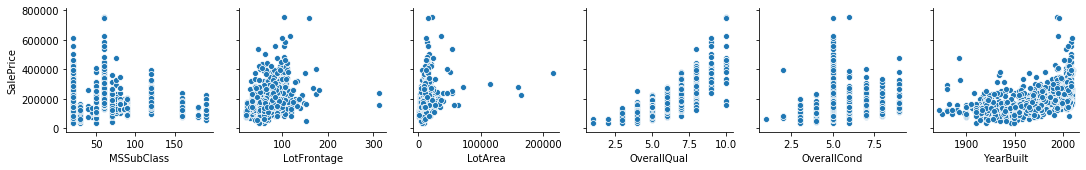

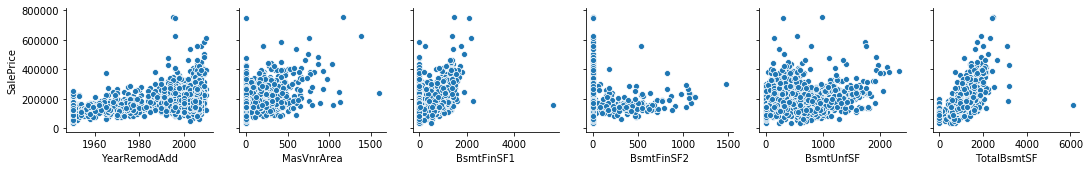

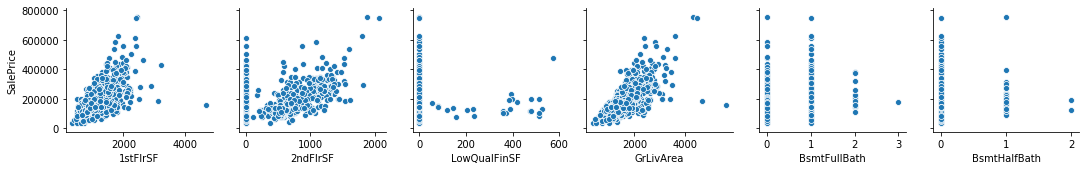

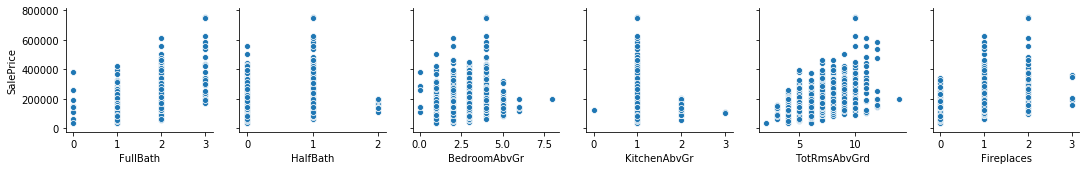

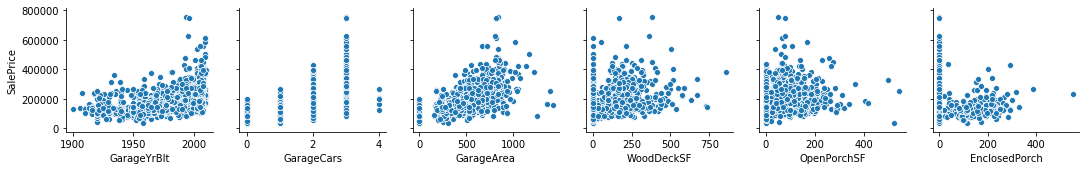

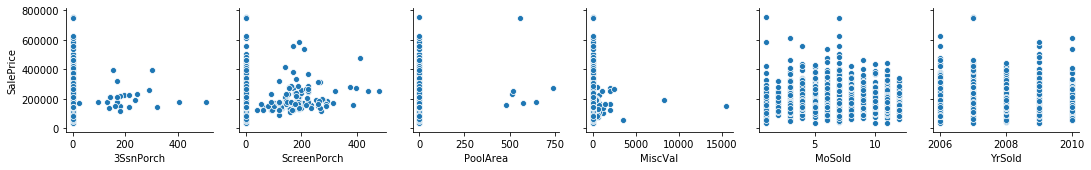

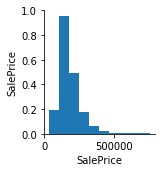

In [13]:
for i in range(0, len(df2_num.columns),6):
    sns.pairplot(data=df2_num, x_vars=df2_num.columns[i:i+6], y_vars=['SalePrice'])

In [14]:
df2_num.isnull().sum()

MSSubClass         0
LotFrontage      259
LotArea            0
OverallQual        0
OverallCond        0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         8
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
LowQualFinSF       0
GrLivArea          0
BsmtFullBath       0
BsmtHalfBath       0
FullBath           0
HalfBath           0
BedroomAbvGr       0
KitchenAbvGr       0
TotRmsAbvGrd       0
Fireplaces         0
GarageYrBlt       81
GarageCars         0
GarageArea         0
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
3SsnPorch          0
ScreenPorch        0
PoolArea           0
MiscVal            0
MoSold             0
YrSold             0
SalePrice          0
dtype: int64

FILLING THE MISSING VALUES IN EVERY FEATURE

In [15]:
df2['LotFrontage']=df2['LotFrontage'].fillna(df2['LotFrontage'].mean())
df['BsmtCond']=df['BsmtCond'].fillna(df['BsmtCond'].mode()[0])
df['BsmtQual']=df['BsmtQual'].fillna(df['BsmtQual'].mode()[0])
df['GarageType']=df['GarageType'].fillna(df['GarageType'].mode()[0])
df['GarageFinish']=df['GarageFinish'].fillna(df['GarageFinish'].mode()[0])
df['GarageQual']=df['GarageQual'].fillna(df['GarageQual'].mode()[0])
df['GarageCond']=df['GarageCond'].fillna(df['GarageCond'].mode()[0])
df['MasVnrType']=df['MasVnrType'].fillna(df['MasVnrType'].mode()[0])
df['MasVnrArea']=df['MasVnrArea'].fillna(df['MasVnrArea'].mode()[0])

In [16]:
df2.dropna(inplace=True)

## Working with categorical values

In [18]:
df2_catv=df2.select_dtypes(include = 'object')
df2_catv

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1456,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Min1,Attchd,Unf,TA,TA,Y,WD,Normal
1457,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1458,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,...,FuseA,Gd,Typ,Attchd,Unf,TA,TA,Y,WD,Normal


In [19]:
df2_catv.fillna('NONE',inplace=True)
df_cat_encoded = pd.get_dummies(df2_catv, columns=['MSZoning'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Street'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['LotShape'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['LandContour'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Utilities'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['LotConfig'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['LandSlope'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Neighborhood'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Condition1'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Condition2'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['BldgType'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['HouseStyle'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['RoofStyle'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['RoofMatl'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Exterior1st'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Exterior2nd'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['MasVnrType'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['ExterQual'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['ExterCond'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Foundation'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['BsmtQual'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['BsmtCond'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['BsmtExposure'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['BsmtFinType1'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['BsmtFinType2'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Heating'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['HeatingQC'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['CentralAir'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Electrical'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['KitchenQual'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['Functional'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['GarageType'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['GarageFinish'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['GarageQual'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['GarageCond'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['PavedDrive'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['SaleType'])
df_cat_encoded = pd.get_dummies(df_cat_encoded, columns=['SaleCondition'])


/home/siddharth/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4244: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


In [42]:
df_cat_encoded=df_cat_encoded.astype(float)
df_cat_encoded.head()

,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,LotShape_IR1,LotShape_IR2,LotShape_IR3,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [78]:
scale=StandardScaler()
df3=df2_num.merge(df_cat_encoded, left_index=True,right_index=True)

df_scaled=pd.DataFrame(scale.fit_transform(df3),columns=df3.columns)
df_scaled['SalePrice']=df2_num['SalePrice']

In [79]:
df_scaled.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0.095035,-0.235893,-0.219483,0.583981,-0.549472,1.008856,0.850062,0.461582,0.522711,-0.295297,...,-0.054595,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131
1,-0.875869,0.376575,-0.108069,-0.170374,2.234428,0.095343,-0.481359,-0.594820,1.114902,-0.295297,...,-0.054595,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131
2,0.095035,-0.113400,0.051786,0.583981,-0.549472,0.941188,0.800751,0.278328,0.043733,-0.295297,...,-0.054595,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131
3,0.337760,-0.440050,-0.112913,0.583981,-0.549472,-1.968520,-0.777230,-0.594820,-0.544104,-0.295297,...,-0.054595,-0.312857,-0.027267,0.396676,3.827684,-0.027267,-0.077324,-0.122813,-2.157652,-0.317131
4,0.095035,0.539900,0.343400,1.338335,-0.549472,0.907354,0.702127,1.291612,0.411675,-0.295297,...,-0.054595,-0.312857,-0.027267,0.396676,-0.261255,-0.027267,-0.077324,-0.122813,0.463467,-0.317131


In [81]:
train=df_scaled

In [82]:

Xtrain=train
y=train['SalePrice'].values

Xtrain, Xtest, ytrain, ytest=train_test_split(Xtrain, y, test_size=0.33,random_state=42)

In [ ]:

def create_model():
    model = Sequential()
    model.add(Dense(20, input_dim=Xtrain.shape[1], activation ='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu')
    model.add(Dense(1))
    sgd=optimizers.SGD(lr=0.01, momentum=0.9, clipnorm=0.1)
    model.compile(optimizer= 'sgd' ,loss = 'mean_squared_error', metrics =['accuracy'])
    
    return model


In [94]:
model = create_model()
model.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_57 (Dense)             (None, 20)                5340      
_________________________________________________________________
dense_58 (Dense)             (None, 10)                210       
_________________________________________________________________
dense_59 (Dense)             (None, 10)                110       
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 10)                0         
_________________________________________________________________
dense_60 (Dense)             (None, 1)                 11        
Total params: 5,671
Trainable params: 5,671
Non-trainable params: 0
_________________________________________________________________


In [92]:
history = model.fit(Xtrain, ytrain, validation_data=(Xtest,ytest), epochs=150, batch_size=32)

Train on 901 samples, validate on 445 samples
Epoch 1/150
901/901 [==============================] - 0s 436us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 2/150
901/901 [==============================] - 0s 149us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 3/150
901/901 [==============================] - 0s 116us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 4/150
901/901 [==============================] - 0s 128us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 5/150
901/901 [==============================] - 0s 235us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 6/150
901/901 [==============================] - 0s 325us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 7/150
901/901 [==============================] - 0s 268us/step - l

901/901 [==============================] - 0s 315us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 112/150
901/901 [==============================] - 0s 339us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 113/150
901/901 [==============================] - 1s 570us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 114/150
901/901 [==============================] - 0s 513us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 115/150
901/901 [==============================] - 0s 394us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 116/150
901/901 [==============================] - 0s 436us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: nan - val_accuracy: 0.0000e+00
Epoch 117/150
901/901 [==============================] - 0s 449us/step - loss: nan - accuracy: 0.0000e+00 - val_loss: na

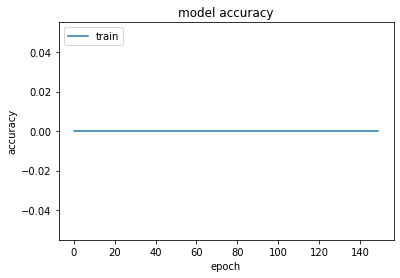

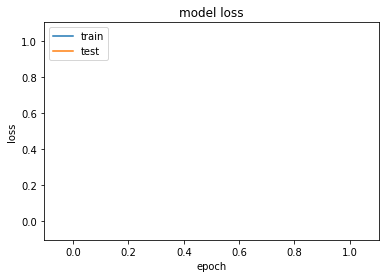

In [50]:
plt.plot(history.history['accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [41]:
prediction=model.predict(X_test)

In [42]:
submission =pd.DataFrame()
submission['Id'] = id_col
submission['SalePrice'] = prediction

In [43]:
submission.to_csv('submission.csv',index=False)